In [1]:
print('hello')

hello


In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("police_deaths_USA_v6.csv")

In [4]:
print(df)

                 Rank                    Name   Age End_Of_Watch Day_Of_Week  \
0           Constable           Darius Quimby   NaN   1791-01-03      Monday   
1             Sheriff      Cornelius Hogeboom  53.0   1791-10-22    Saturday   
2      Deputy Sheriff             Isaac Smith   NaN   1792-05-17    Thursday   
3             Marshal          Robert Forsyth  40.0   1794-01-11    Saturday   
4      Deputy Sheriff          Robert Berwick   NaN   1797-06-29    Thursday   
...               ...                     ...   ...          ...         ...   
25618  Police Officer           Donald Sahota  52.0   2022-01-29    Saturday   
25619  Deputy Sheriff             Ned P. Byrd  48.0   2022-08-11    Thursday   
25620      K9 Officer   Ryan Patrick Copeland  33.0   2015-11-23      Monday   
25621      K9 Officer  Timothy James Brackeen  38.0   2016-09-12      Monday   
25622      K9 Officer   Jordan Harris Sheldon  32.0   2019-05-04    Saturday   

                       Cause  \
0      

In [5]:
print(df.head(10))

             Rank                 Name   Age End_Of_Watch Day_Of_Week  \
0       Constable        Darius Quimby   NaN   1791-01-03      Monday   
1         Sheriff   Cornelius Hogeboom  53.0   1791-10-22    Saturday   
2  Deputy Sheriff          Isaac Smith   NaN   1792-05-17    Thursday   
3         Marshal       Robert Forsyth  40.0   1794-01-11    Saturday   
4  Deputy Sheriff       Robert Berwick   NaN   1797-06-29    Thursday   
5         Sheriff       Robert Maxwell  45.0   1797-11-12      Sunday   
6  Superintendent         Hilary Baker  52.0   1798-09-25     Tuesday   
7    High Sheriff   John Caldwell Cook  74.0   1804-10-16     Tuesday   
8        Watchman  Christian Luswanger   NaN   1806-12-25    Thursday   
9  Deputy Sheriff        John A. Gooch   NaN   1807-03-07    Saturday   

                  Cause                                         Department  \
0               Stabbed         Albany County Constable's Office, New York   
1               Gunfire         Columbia

Edad máxima por rango

In [20]:
#Edad máxima por rango
print("Edad máxima por rango:")
df.groupby('Rank')['Age'].max()

Edad máxima por rango:


Rank
ALE Agent I                 24.0
ATSAIC                      44.0
Abatement Officer           43.0
Acting Chief                56.0
Acting Chief of Police      58.0
                            ... 
Wildlife Technician         37.0
Youth Counselor             42.0
Youth Development Worker    49.0
Youth Officer               45.0
Zone Sergeant               48.0
Name: Age, Length: 618, dtype: float64

Edad mínima por rango

In [21]:
print("Edad mínima por rango:")
min_age_by_rank = df.groupby('Rank')['Age'].min().sort_values()
print(min_age_by_rank.head(15))

Edad mínima por rango:
Rank
Private                     17.0
Military Police Officer     17.0
Deputy Marshal              17.0
Deputy Jailer               17.0
Jailer                      17.0
Deputy Sheriff              18.0
Security Policeman          18.0
Special Agent               18.0
Jail Officer                19.0
Inspector                   19.0
Policeman                   19.0
Auxiliary Police Officer    19.0
Reserve Officer             19.0
Police Chief                19.0
Special Deputy Sheriff      19.0
Name: Age, dtype: float64


Edad promedio

In [7]:
media = df['Age'].mean()
print("La media de la columna Valor es:", media)

La media de la columna Valor es: 40.28941863505622


In [8]:
df.groupby('Cause')['Age'].median()

Cause
9/11 related illness        53.0
Accidental                  42.0
Aircraft accident           36.0
Animal related              43.0
Assault                     45.0
Automobile crash            37.0
Bicycle accident            44.0
Boating accident            40.0
Bomb                        35.5
COVID19                     52.0
Drowned                     37.0
Duty related illness        42.0
Electrocuted                36.0
Explosion                   40.5
Exposure to toxins          36.5
Fall                        43.0
Fire                        36.0
Gunfire                     38.0
Gunfire (Inadvertent)       34.0
Heart attack                48.0
Heatstroke                  34.0
Hypothermia                 45.0
Motorcycle crash            32.0
Poisoned                    58.0
Stabbed                     40.0
Struck by streetcar         44.0
Struck by train             39.0
Struck by vehicle           40.0
Structure collapse          41.0
Terrorist attack            40.0
Trai

Número de oficiales por rango

In [23]:
print("\
Número de oficiales por rango (top 15):")
rank_counts = df['Rank'].value_counts().head(15)
print(rank_counts)

Número de oficiales por rango (top 15):
Rank
Patrolman          3841
Police Officer     3514
Deputy Sheriff     3215
Officer            1699
Sergeant           1420
Detective           853
Trooper             842
Sheriff             768
Chief of Police     680
Constable           593
Policeman           560
Lieutenant          477
Special Agent       418
Corporal            301
Captain             278
Name: count, dtype: int64


Graficamos

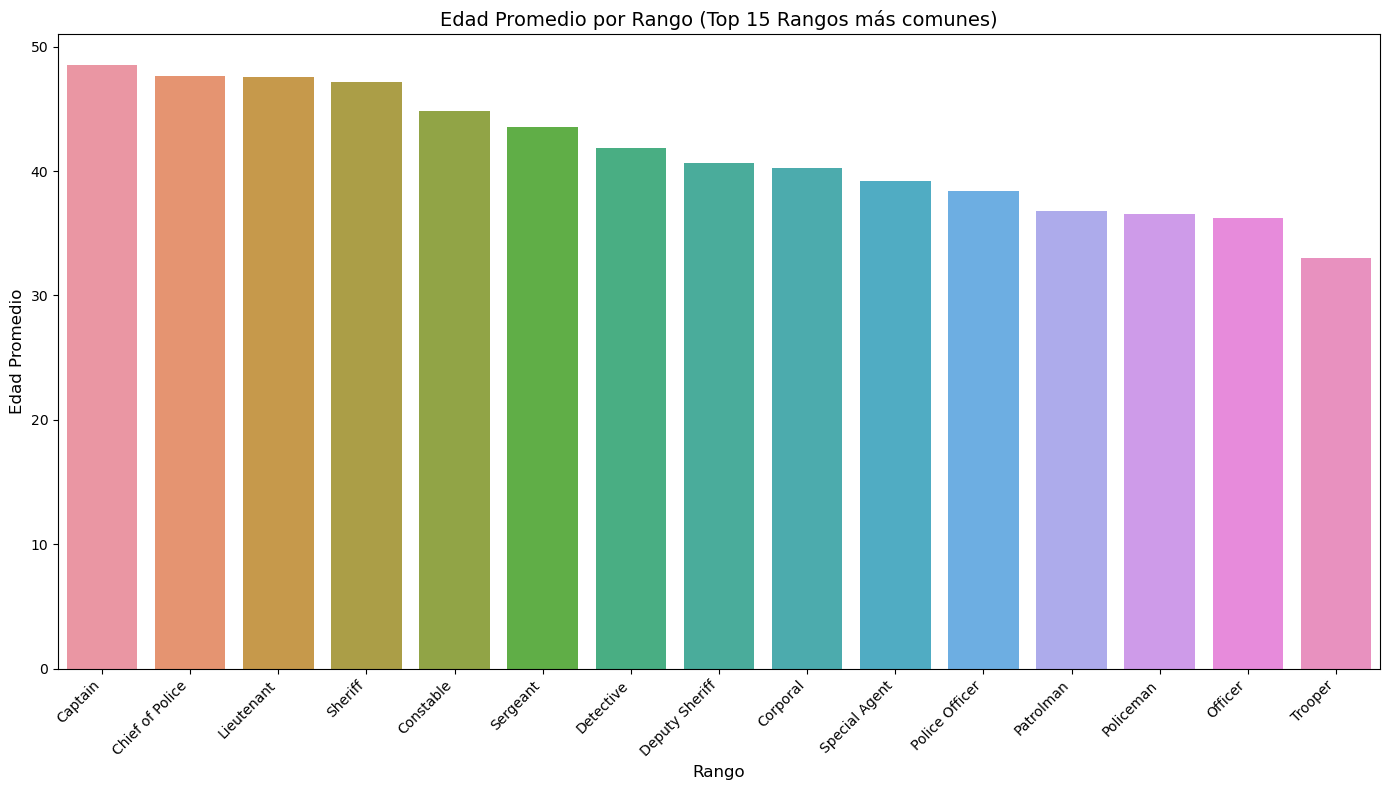

In [30]:
top_ranks = rank_counts.index.tolist()
plt.figure(figsize=(14, 8))
avg_age_top_ranks = df[df['Rank'].isin(top_ranks)].groupby('Rank')['Age'].mean().sort_values(ascending=False)
sns.barplot(x=avg_age_top_ranks.index, y=avg_age_top_ranks.values)
plt.title('Edad Promedio por Rango (Top 15 Rangos más comunes)', fontsize=14)
plt.xlabel('Rango', fontsize=12)
plt.ylabel('Edad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Análisis de causas de muerte por rango (top 5 rangos y top 5 causas)

In [32]:

print("\
Causas de muerte más comunes por rango (top 5 rangos):")
top5_ranks = rank_counts.index.tolist()[:5]
for rank in top5_ranks:
    print(f"\
Rango: {rank}")
    print(df[df['Rank'] == rank]['Cause'].value_counts().head(5))

Causas de muerte más comunes por rango (top 5 rangos):
Rango: Patrolman
Cause
Gunfire              1856
Motorcycle crash      364
Automobile crash      272
Struck by vehicle     197
Heart attack          166
Name: count, dtype: int64
Rango: Police Officer
Cause
Gunfire              1583
Automobile crash      292
Vehicular assault     215
Motorcycle crash      211
Heart attack          176
Name: count, dtype: int64
Rango: Deputy Sheriff
Cause
Gunfire              1935
Automobile crash      428
Heart attack          132
Vehicular assault     110
Struck by vehicle      95
Name: count, dtype: int64
Rango: Officer
Cause
Gunfire              780
Motorcycle crash     215
Automobile crash     137
Vehicular assault    117
Vehicle pursuit       85
Name: count, dtype: int64
Rango: Sergeant
Cause
Gunfire              555
Automobile crash     167
Heart attack         122
COVID19              113
Vehicular assault     63
Name: count, dtype: int64


graficamos 5 causas de muerte más comunes para los 5 rangos más frecuentes

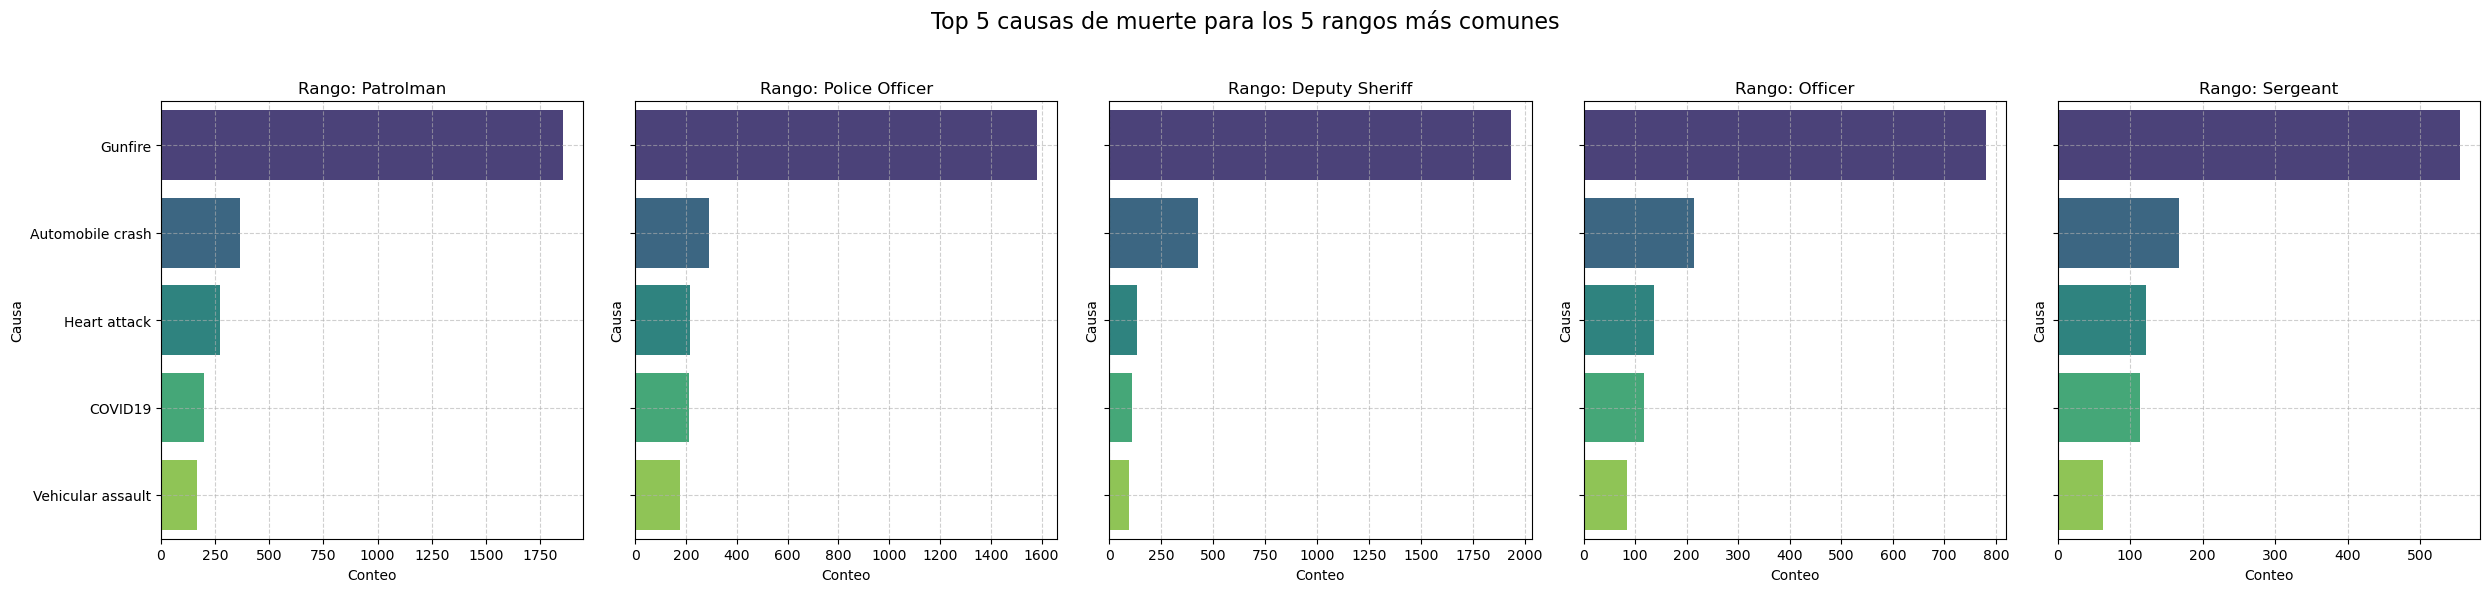

Gráfico de causas de muerte por rango generado.


In [ ]:
# Crear figura y ejes para múltiples subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 6), sharey=True)

# Iterar sobre cada uno de los top5 rangos y graficar sus top 5 causas de muerte
for ax, rank in zip(axes, top5_ranks):
    # Filtrar dataframe para el rango actual y obtener las 5 causas más comunes
    causes = df[df['Rank'] == rank]['Cause'].value_counts().head(5)
    sns.barplot(x=causes.values, y=causes.index, ax=ax, palette='viridis')
    ax.set_title('Rango: ' + rank)
    ax.set_xlabel('Conteo')
    ax.set_ylabel('Causa')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Top 5 causas de muerte para los 5 rangos más comunes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print('Gráfico de causas de muerte por 5 rangos más comunes.')